### Изучение общей информации

In [1]:
#вызов библиотеки Pandas
import pandas as pd
# Импорт библиотеки Seaborn для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#исследование информации об играх
games = pd.read_csv('/datasets/games.csv', sep=',')
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#просмотр сводной информации о наборе данных в таблице с информацией об играх
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Вывод

**Таблица "Информация об играх"**
1. Содержит полную информацию об играх (16715 строк и 11 колонок).
2. Следующие колонки содержат прошущенные значения:
    + "Название игры";
    + "Год выпуска";
    + "Жанр игры";
    + "Оценка критиков";
    + "Оценка пользователей";
    + "Рейтин от организации ESRB". 
Необходимо разобрать в природе пропусков, удалить или предзаполнить пропуски.
3. Колонка "Оценка пользователей" содержит значение "tbd". Необходимо разобрать данное значение и обработать.
4. Колонка "Год выпуска" имеет тип данных - float64 (вещественное число). Год исчисляется в целых величинах. Для дальнейших операций со значениями указанной колонки, необходимо преобразовать тип колонки в формат - int64 (целое число).
5. Колонка "Оценка пользователей" имеет тип данных - object (строка). После выполнения вышестоящего пункта 4, необходимо преобразовать тип колонки в формат даты - float64 (вещественное число).
6. Колонка "Оценка критиков" содержит значения от 1 до 100. Формат значений напоминает проценты, поэтому изменим формат на int64 (целое число).
7. Системные наименования столбцов содержат значения разных регистров. Необходимо привести все системные названия колонк к нижнему регистру.

### Подготовка данных

In [4]:
# Заменим все системные названия столбцов (приведем к нижнему регистру)
games.columns = map(str.lower, games.columns)
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
# Замена пропусков в колонке "Год выпуска"
games['year_of_release'] = games['year_of_release'].fillna('0')

# Замена типа данных в колонке "Год выпуска"
games['year_of_release'] = games['year_of_release'].astype('int')

In [6]:
# Поиск уникальных значений "Оценка пользователей"
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# Создаем новый столбец "Суммарные продажи для значения tbd 
games['all_sales_tbd'] = games[games['user_score']=='tbd']['na_sales'] + games[games['user_score']=='tbd']['eu_sales'] + games[games['user_score']=='tbd']['jp_sales'] + games[games['user_score']=='tbd']['other_sales']
print(games[games['user_score']=='tbd']['all_sales_tbd'] .max())
print(games[games['user_score']=='tbd']['all_sales_tbd'] .min())

6.7
0.01


Сделаем предположение по природе возникновения значения "tbd" - пользователи отказались ставить оценку (tbd - объем продаж от 0.01 до 6.7). 
Поэтому все найденные нами значения "tbd" сначала заменим на значение Nan (тип поля object). Затем заменим тип данных на int64 и значение Nan заменим на "0".

In [8]:
# Замена значений "tbd" на "0" в колонке "Оценка пользователей"
games['user_score'] = games['user_score'].replace('tbd','0')

# Замена пропусков в колонке "Оценка пользователей"
games['user_score'] = games['user_score'].fillna('0')

# Замена типа данных в колонке "Оценка пользователей"
games['user_score'] = games['user_score'].astype('float64')

In [9]:
# Поиск уникальных значений в колонке "Оценка критиков"
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
# Замена пропусков в колонке "Оценка критиков"
games['critic_score'] = games['critic_score'].fillna('0')

# Замена типа данных в колонке "Оценка критиков"
games['critic_score'] = games['critic_score'].astype('int')

In [11]:
# Создаем новый столбец "Суммарные продажи во всех регионах" 
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales_tbd,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,NaN,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,NaN,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,NaN,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,NaN,31.38


### Вывод

1. Преобразованы системные наименования колонок. Все системные наименования приведены к нижнему регистру.
2. Проанализирована природа неизвестного значения "tbd" в колонке "Оценка пользователей" и произведена его замена на значение Nan.
3. Произведено заполнение пропусков на значение 0 в следующих колонках:
    + "Год выпуска";
    + "Оценка критиков";
    + "Оценка пользователей".
4. Оставлены без заполнения пропуски в следующих колонках (тип колонок object и не известно на что производить замену):
    + "Название игры";
    + "Жанр игры";
    + "Рейтин от организации ESRB". 
5. Произведена замена типа данных в следующих колонках:
    + "Год выпуска". Тип данных изменен на тип int64 (целое число).
    + "Оценка пользователей". Тип данных изменен на тип float64 (вещественное число).
    + "Оценка критиков". Тип данных изменен на тип int64 (целое число).

### Исследовательский анализ данных

In [12]:
# Расчет количества игр в разрезе годов выпуска
games_years = games.pivot_table(index=['year_of_release'], 
                                      values = 'name', 
                                      aggfunc = ['count']).stack().reset_index()
games_years = games_years.loc[:, ['year_of_release','count']]
games_years.drop(games_years[games_years['year_of_release']==0].index, inplace = True)
games_years

,year_of_release,count
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


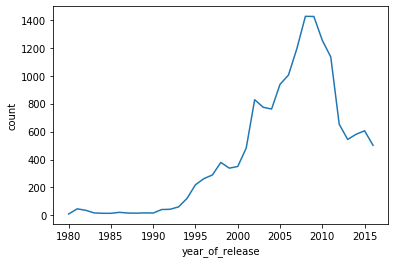

In [13]:
# Построим график количества игр в разрезе годов выпуска
sns.lineplot(x="year_of_release", y="count",
             data=games_years)

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: count, dtype: float64


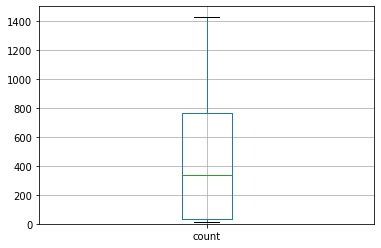

In [14]:
# Построим диаграмму размаха количества игр
games_years.boxplot('count')
plt.ylim(0, 1500)
print(games_years['count'].describe())

In [15]:
# Расчет количества игр и общих продаж в разрезе платформ
platform = games.pivot_table(index=['platform'], 
                                      values = 'all_sales', 
                                      aggfunc = ['sum','count']).stack().reset_index()
platform_top = platform.sort_values(by=['sum','platform'], ascending = False)
platform_top

,platform,level_1,sum,count
16,PS2,all_sales,1255.77,2161
28,X360,all_sales,971.42,1262
17,PS3,all_sales,939.65,1331
26,Wii,all_sales,907.51,1320
4,DS,all_sales,806.12,2151
15,PS,all_sales,730.86,1197
6,GBA,all_sales,317.85,822
18,PS4,all_sales,314.14,392
19,PSP,all_sales,294.05,1209
13,PC,all_sales,259.52,974


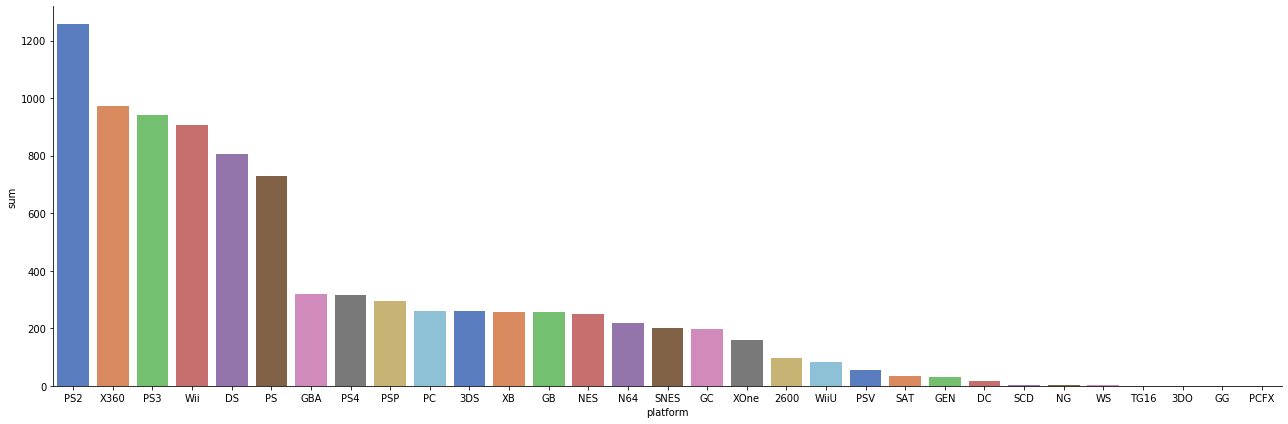

In [16]:
# Построим график продаж в разрезе платформ
sns.catplot(x="platform", y="sum"
                     , data=platform_top,
                height=6, kind="bar", palette="muted", aspect=3)

count      31.000000
mean      287.603548
std       348.160256
min         0.030000
25%        23.360000
50%       200.040000
75%       304.095000
max      1255.770000
Name: sum, dtype: float64


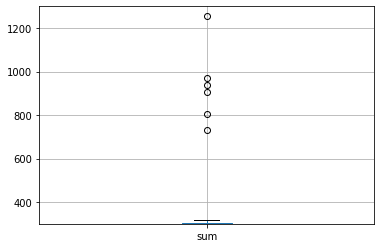

In [17]:
# Расчет основных показателей по платформам
platform_top.boxplot('sum')
plt.ylim(300, 1300)
print(platform_top['sum'].describe())

In [18]:
# Расчет порога в 75% (квантиль) для расчета прибыльных платформ
Q75 = platform_top['sum'].quantile(q=0.75)

platform_top.drop(platform_top[platform_top['sum']<Q75].index, inplace = True)
platform_top

,platform,level_1,sum,count
16,PS2,all_sales,1255.77,2161
28,X360,all_sales,971.42,1262
17,PS3,all_sales,939.65,1331
26,Wii,all_sales,907.51,1320
4,DS,all_sales,806.12,2151
15,PS,all_sales,730.86,1197
6,GBA,all_sales,317.85,822
18,PS4,all_sales,314.14,392


In [19]:
# Расчет прибыли в разрезе платформ и годов выпуска
platform_years_all = games.pivot_table(index=['platform','year_of_release'], 
                                      values = 'all_sales', 
                                      aggfunc = ['sum']).stack().reset_index()
platform_years_all.set_axis(['platform',
                'year_of_release',
                'delete',
                'sum_year'], axis = 'columns',inplace=True)
platform_years_all = platform_years_all.loc[:, ['platform','year_of_release','sum_year']]
platform_years_all.drop(platform_years_all[platform_years_all['year_of_release']==0].index, inplace = True)
platform_years_all

,platform,year_of_release,sum_year
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
5,2600,1984,0.27
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,60.14


In [20]:
# Объединяем таблицы "Тип игр" и "Прибыль в разрезе платформ и годов выпуска"
platform_top_years = platform_top.merge(platform_years_all,on=['platform'],how='inner')
platform_top_years = platform_top_years.sort_values(by=['platform','year_of_release','sum_year'], ascending = False)

# Фильтруем общую таблицу, удаляя записи с годом выпуска раньше 1995 года
platform_top_years.drop(platform_top_years[platform_top_years['year_of_release']<1995].index, inplace = True)
platform_top_years

,platform,level_1,sum,count,year_of_release,sum_year
23,X360,all_sales,971.42,1262,2016,1.52
22,X360,all_sales,971.42,1262,2015,11.96
21,X360,all_sales,971.42,1262,2014,34.74
20,X360,all_sales,971.42,1262,2013,88.58
19,X360,all_sales,971.42,1262,2012,99.74
...,...,...,...,...,...,...
51,DS,all_sales,806.12,2151,2008,145.31
50,DS,all_sales,806.12,2151,2007,146.94
49,DS,all_sales,806.12,2151,2006,119.81
48,DS,all_sales,806.12,2151,2005,130.14


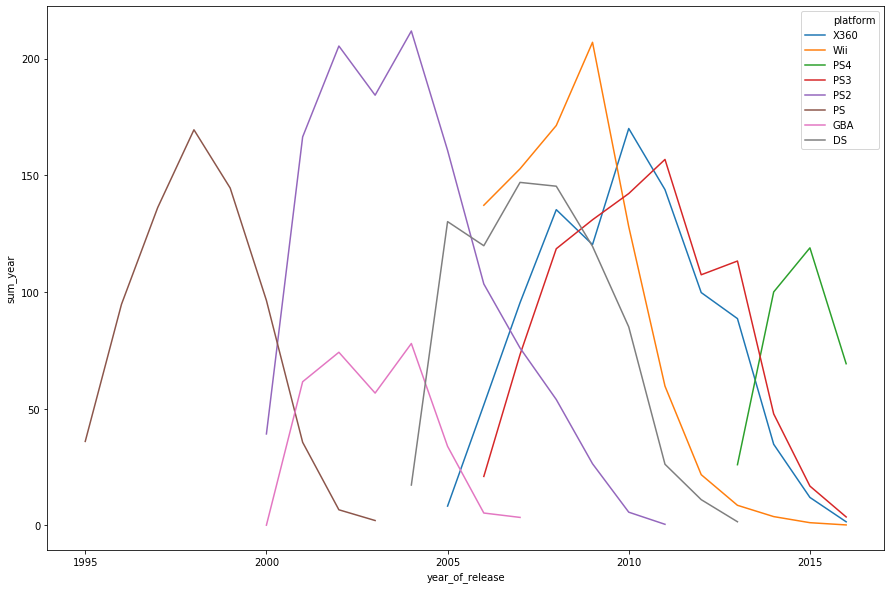

In [21]:
# Строим график прибыли по топовым платформам в разрезе годов выпуска
plt.figure(figsize=(15,10))
sns.lineplot(x="year_of_release", y="sum_year",hue="platform", 
             data=platform_top_years)

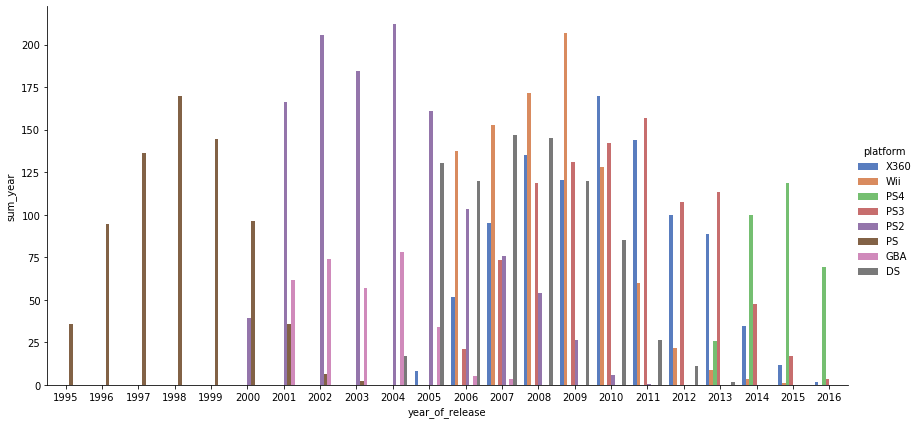

In [22]:
# Строим график прибыли по топовым платформам в разрезе годов выпуска
sns.catplot(x="year_of_release", y="sum_year" , hue="platform"
                     , data=platform_top_years,
                height=6, kind="bar", palette="muted", aspect=2)

In [23]:
# Расчет актуального периода с 2010 по 2016
games_period = games[games['year_of_release']>=2010]

In [24]:
# Расчет объема продаж в разрезе платфом и годов выпуска в пределах актуального периода
games_period_years = games_period.pivot_table(index=['platform','year_of_release'], 
                                      values = 'all_sales', 
                                      aggfunc = ['sum','count']).stack().reset_index()
games_period_years.set_axis(['platform',
                'year_of_release',
                'delete',
                'sum_year',
                'count_year'], axis = 'columns',inplace=True)
games_period_years = games_period_years.loc[:, ['platform','year_of_release','sum_year','count_year']]
games_period_years = games_period_years.sort_values(by=['sum_year','platform'], ascending = False)
games_period_years

,platform,year_of_release,sum_year,count_year
54,X360,2010,170.03,182
20,PS3,2011,156.78,215
55,X360,2011,143.84,206
19,PS3,2010,142.17,181
42,Wii,2010,127.95,253
...,...,...,...,...
47,Wii,2015,1.14,4
18,PS2,2011,0.45,7
34,PSP,2014,0.24,10
48,Wii,2016,0.18,1


In [25]:
# Расчет лидеров-платформ по продажам (количество и среднее значение)
games_period_sales = games_period.pivot_table(index=['platform'], 
                                      values = 'all_sales', 
                                      aggfunc = ['sum','count','mean']).stack().reset_index()
games_period_sales = games_period_sales.sort_values(by=['sum','platform'], ascending = False)
games_period_sales.head(10)

,platform,level_1,sum,count,mean
4,PS3,all_sales,587.74,889,0.661125
10,X360,all_sales,550.41,680,0.809426
5,PS4,all_sales,314.14,392,0.801378
0,3DS,all_sales,257.81,512,0.503535
8,Wii,all_sales,222.97,450,0.495489
11,XOne,all_sales,159.32,247,0.645020
1,DS,all_sales,123.75,507,0.244083
2,PC,all_sales,121.96,479,0.254614
9,WiiU,all_sales,82.19,147,0.559116
6,PSP,all_sales,64.05,500,0.128100


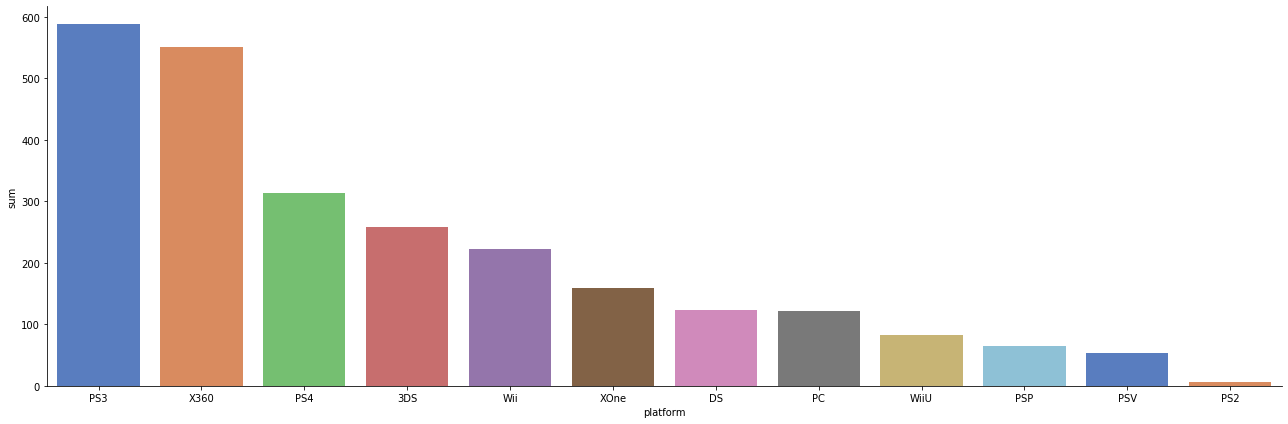

In [26]:
# График лидеры по продажам
sns.catplot(x="platform", y="sum"
                     , data=games_period_sales,
                height=6, kind="bar", palette="muted", aspect=3)

(0, 1.75)

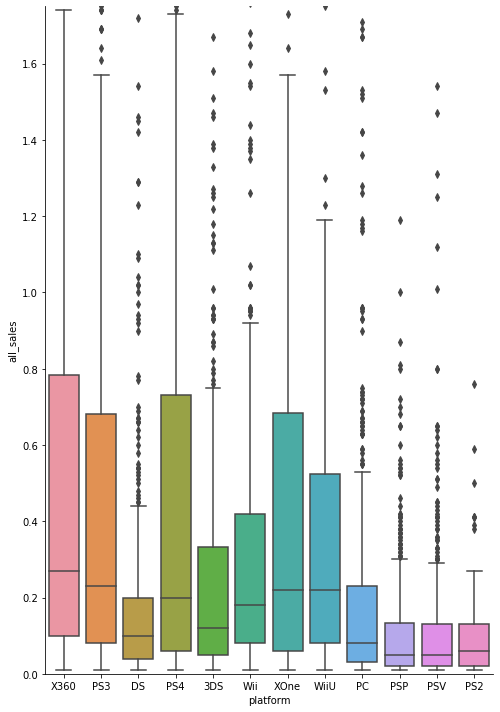

In [27]:
sns.catplot(x="platform",y="all_sales", kind="box", data=games_period,  height=10, aspect=.7)
plt.ylim(0, 1.75)

count     12.000000
mean     212.020000
std      189.061471
min        6.090000
25%       77.655000
50%      141.535000
75%      271.892500
max      587.740000
Name: sum, dtype: float64


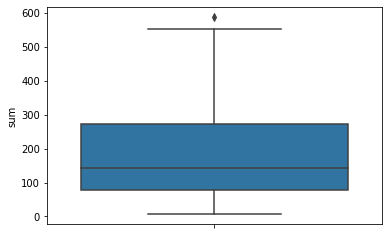

In [28]:
# Построим диаграмму размаха по значениям колонки "Глобальные продажи" с разбивкой по платформам
sns.boxplot(y="sum", data=games_period_sales)
print(games_period_sales['sum'].describe())

count    12.000000
mean      0.446888
std       0.259465
min       0.125431
25%       0.216895
50%       0.499512
75%       0.649046
max       0.809426
Name: mean, dtype: float64


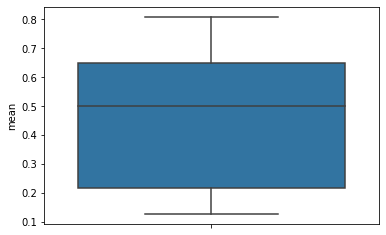

In [29]:
# Построим диаграмму размаха по значениям колонки "Средние продажи" с разбивкой по платформам
sns.boxplot(y="mean", data=games_period_sales)
print(games_period_sales['mean'].describe())

count     12.000000
mean     439.750000
std      224.750822
min       45.000000
25%      355.750000
50%      464.500000
75%      508.250000
max      889.000000
Name: count, dtype: float64


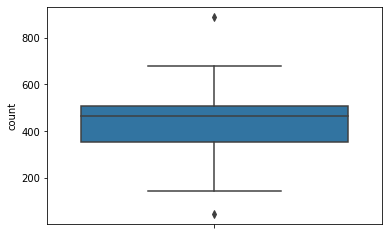

In [30]:
# Построим диаграмму размаха по значениям колонки "Количество продаж" в разрезе платформ
sns.boxplot(y="count", data=games_period_sales)
print(games_period_sales['count'].describe())

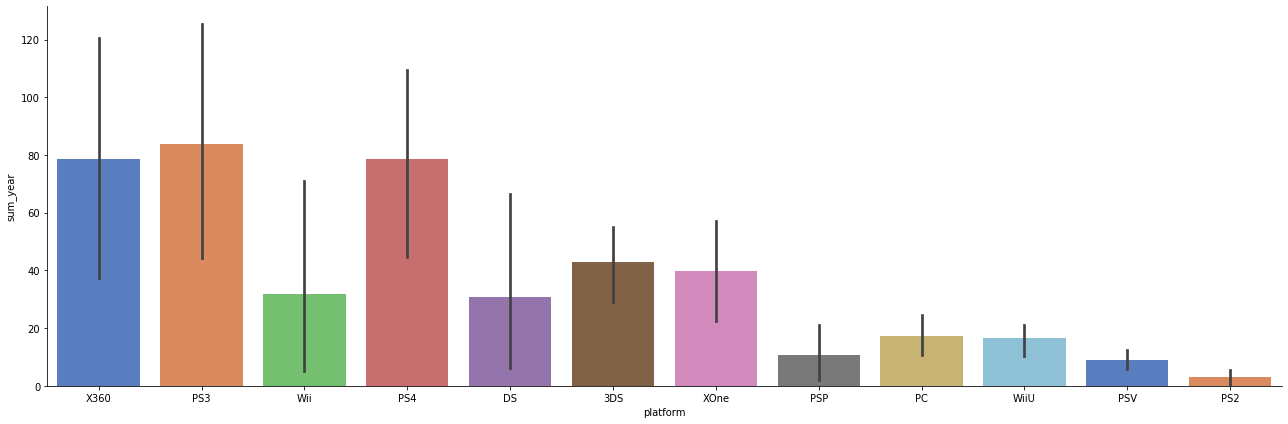

In [31]:
# Динамика (рост или спад)
sns.catplot(x="platform", y="sum_year"
                     , data=games_period_years,
                height=6, kind="bar", palette="muted", aspect=3)

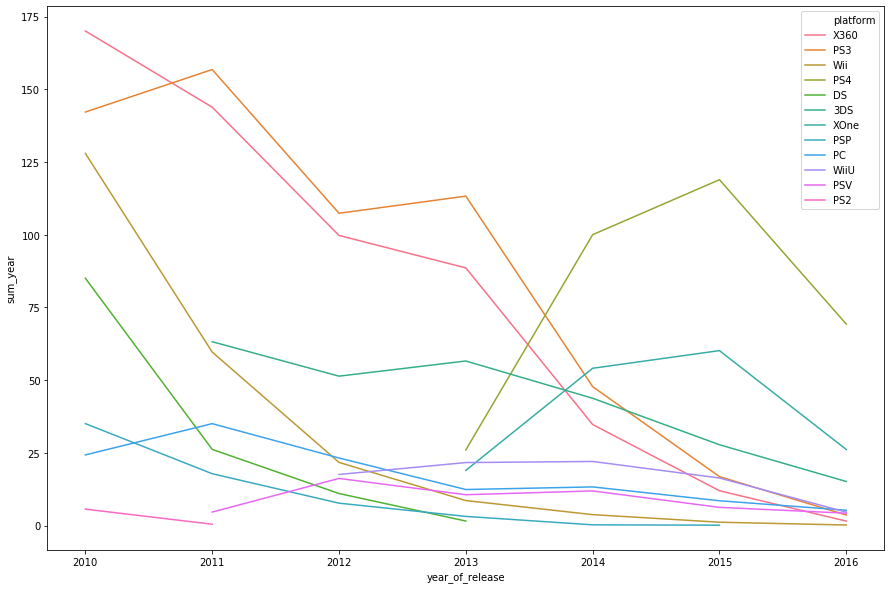

In [32]:
# Динамика (рост или спад)
plt.figure(figsize=(15,10))
sns.lineplot(x="year_of_release", y="sum_year",hue="platform",
             data=games_period_years)

In [33]:
# Расчет первых 3 платформ с максимальными продажами в 2016 году
games_period_years[games_period_years['year_of_release']==2016].sort_values(by=['sum_year','platform'], ascending = False)

,platform,year_of_release,sum_year,count_year
29,PS4,2016,69.25,164
64,XOne,2016,26.15,87
5,3DS,2016,15.14,46
16,PC,2016,5.25,54
53,WiiU,2016,4.60,14
41,PSV,2016,4.25,85
25,PS3,2016,3.60,38
60,X360,2016,1.52,13
48,Wii,2016,0.18,1


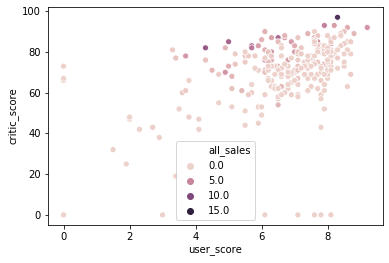

In [34]:
# Построим график по одной из популярных платформ - PS4
sns.scatterplot(x="user_score", y="critic_score",
                     hue="all_sales", data=games_period[games_period['platform']=='PS4'])

In [35]:
# Расчет корреляции между отзывами пользователей и продажами
print('Коэффициент корреляции между отзывами пользователей и продажами: ', games_period[games_period['platform']=='PS4']['user_score'].corr(games_period[games_period['platform']=='PS4']['all_sales']))
# Расчет корреляции между отзывами критиков и продажами
print('Коэффициент корреляции между отзывами критиков и продажами: ', games_period[games_period['platform']=='PS4']['critic_score'].corr(games_period[games_period['platform']=='PS4']['all_sales']))

Коэффициент корреляции между отзывами пользователей и продажами:  0.11311562450852881
Коэффициент корреляции между отзывами критиков и продажами:  0.22754960627752652


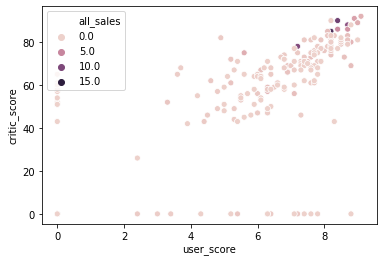

In [36]:
# Построим график по одной из популярных платформ - 3DS
sns.scatterplot(x="user_score", y="critic_score",
                     hue="all_sales", data=games_period[games_period['platform']=='3DS'])

In [37]:
# Расчет корреляции между отзывами пользователей и продажами
print('Коэффициент корреляции между отзывами пользователей и продажами: ', games_period[games_period['platform']=='3DS']['user_score'].corr(games_period[games_period['platform']=='3DS']['all_sales']))
# Расчет корреляции между отзывами критиков и продажами
print('Коэффициент корреляции между отзывами критиков и продажами: ', games_period[games_period['platform']=='3DS']['critic_score'].corr(games_period[games_period['platform']=='3DS']['all_sales']))

Коэффициент корреляции между отзывами пользователей и продажами:  0.1500533936060986
Коэффициент корреляции между отзывами критиков и продажами:  0.16702057976149196


In [38]:
# Расчет лидеров жанра игры по продажам
games_period_genre = games_period.pivot_table(index=['genre'], 
                                      values = 'all_sales', 
                                      aggfunc = ['sum','count','mean']).stack().reset_index()
games_period_genre = games_period_genre.sort_values(by=['sum','genre'], ascending = False)
games_period_genre.head(10)

,genre,level_1,sum,count,mean
0,Action,all_sales,673.09,1495,0.450227
8,Shooter,all_sales,479.74,410,1.170098
10,Sports,all_sales,328.39,575,0.571113
7,Role-Playing,all_sales,315.28,568,0.555070
3,Misc,all_sales,234.56,576,0.407222
6,Racing,all_sales,122.68,237,0.517637
4,Platform,all_sales,119.72,153,0.782484
2,Fighting,all_sales,81.59,199,0.410000
9,Simulation,all_sales,71.75,217,0.330645
1,Adventure,all_sales,61.00,563,0.108348


In [39]:
# Расчет объема продаж в разрезе жанров и года в пределах актуального периода
games_period_genre_years = games_period.pivot_table(index=['genre','year_of_release'], 
                                      values = 'all_sales', 
                                      aggfunc = ['sum','count']).stack().reset_index()
games_period_genre_years.set_axis(['genre',
                'year_of_release',
                'delete',
                'sum_year',
                'count_year'], axis = 'columns',inplace=True)
games_period_genre_years = games_period_genre_years.loc[:, ['genre','year_of_release','sum_year','count_year']]
games_period_genre_years = games_period_genre_years.sort_values(by=['sum_year','genre'], ascending = False)
games_period_genre_years

,genre,year_of_release,sum_year,count_year
3,Action,2013,122.51,147
2,Action,2012,119.25,265
1,Action,2011,116.68,238
0,Action,2010,115.29,226
57,Shooter,2011,98.18,94
...,...,...,...,...
83,Strategy,2016,1.13,13
81,Strategy,2014,0.98,8
38,Puzzle,2013,0.96,3
40,Puzzle,2015,0.71,6


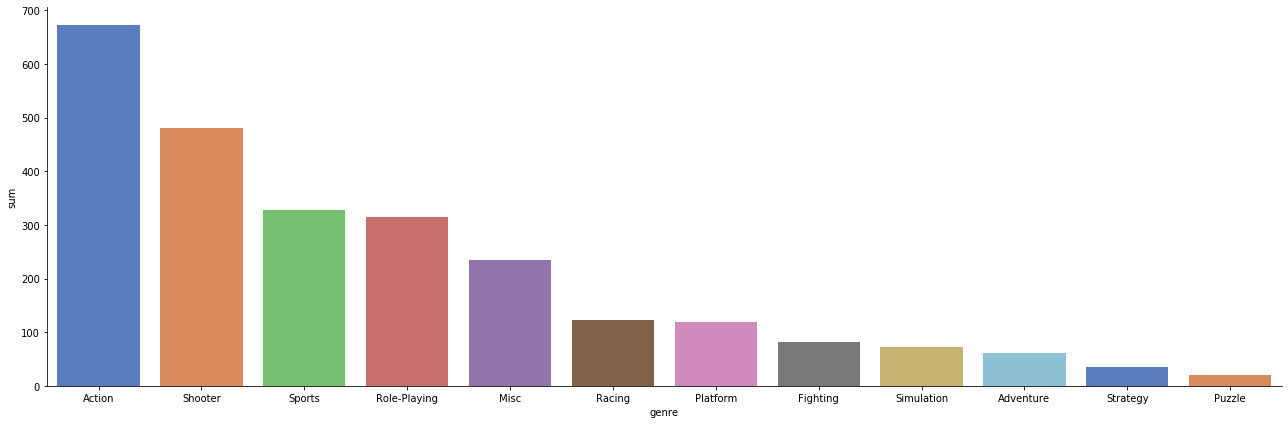

In [40]:
# Построим график лидеров жанра игры по продажам 
sns.catplot(x="genre", y="sum"
                     , data=games_period_genre,
                height=6, kind="bar", palette="muted", aspect=3)

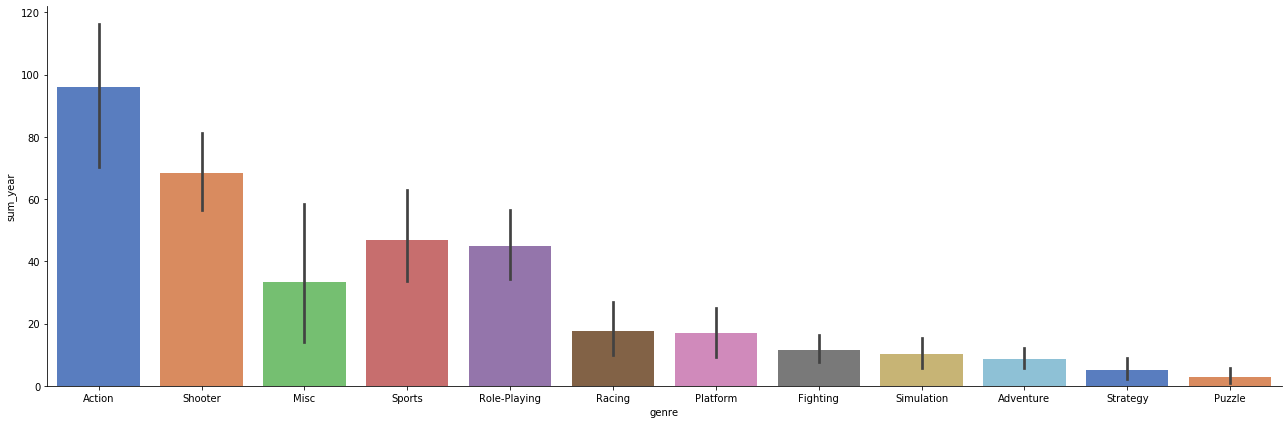

In [41]:
# Построим график динамики (рост или спад)
sns.catplot(x="genre", y="sum_year"
                     , data=games_period_genre_years,
                height=6, kind="bar", palette="muted", aspect=3)

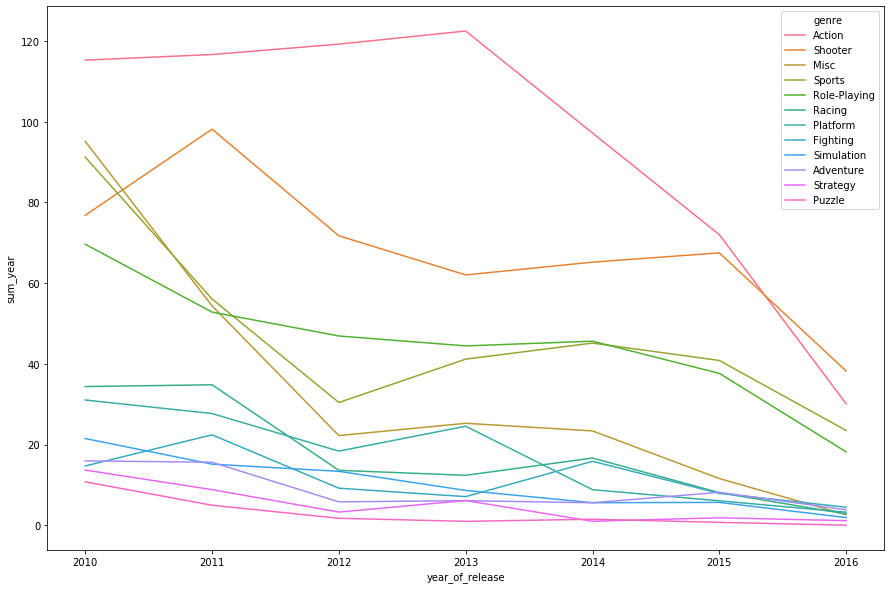

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year_of_release", y="sum_year",hue="genre",
             data=games_period_genre_years)

In [43]:
# Таблица 
games_period_genre

,genre,level_1,sum,count,mean
0,Action,all_sales,673.09,1495,0.450227
8,Shooter,all_sales,479.74,410,1.170098
10,Sports,all_sales,328.39,575,0.571113
7,Role-Playing,all_sales,315.28,568,0.555070
3,Misc,all_sales,234.56,576,0.407222
6,Racing,all_sales,122.68,237,0.517637
4,Platform,all_sales,119.72,153,0.782484
2,Fighting,all_sales,81.59,199,0.410000
9,Simulation,all_sales,71.75,217,0.330645
1,Adventure,all_sales,61.00,563,0.108348


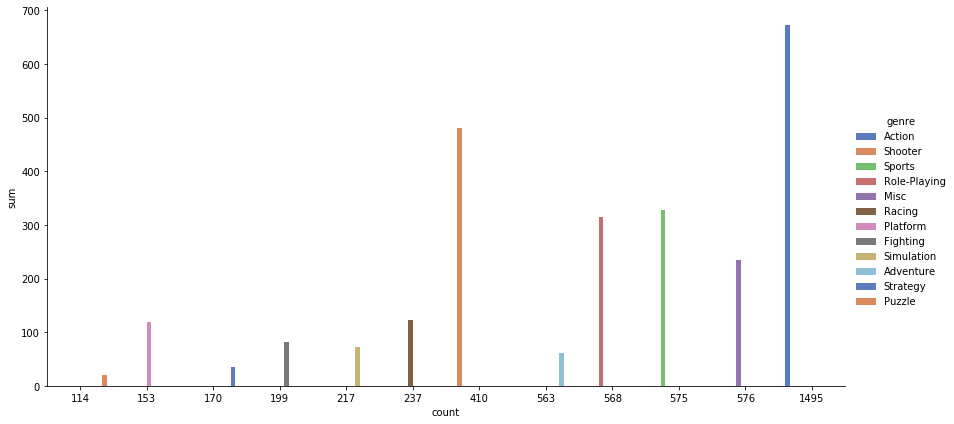

In [44]:
# Построим график лидеров жанра игры по продажам
sns.catplot(x="count", y="sum",hue="genre"
                     , data=games_period_genre,
                height=6, kind="bar", palette="muted", aspect=2)

### Вывод:
1. В данных представлено 37 игр.
2. Период данных по играм с 1980 по 2016 годы.
3. Максимальное количество игр в 2008-2009 годах (1426-1427).
4. Минимальное количество игр в 1980 году (9).
5. В данных представлена 31 платформа.
6. Максимальное количество игр и общих продаж приходится на платформу PS2
7. Минимальное количество игр и общих продаж приходится на платформы GG и  PCFX
8. Каждая платформа "на пике" примерно 5-6 лет, потом про нее забывают.
9. В топ5 лидеров-платформ по продажам можно отнести: PS3, X360, PS4, 3DS, Wii.
10. По всем платформам по состоянию на конец 2016 год происходит спад продаж.
11. По всем жанрам по состоянию на 2016 год происходит спад продаж/
12. Топ3 платформ по продажам в 2016 году можно отнести: PS4, XOne,3DS
13. Топ3 жанров по продажам в 2016 году можно отнести:
    + Action. Количество - 1495, продажи - 673 млн. дол.
    + Shooter. Количество - 410, продажи - 450 млн. дол.
    + Sports. Количество - 575, продажи - 328 млн. дол.
14. Глобальные продажи на разных платформах - 140 млн. дол.
15. Средние продажи на разных платформах - 0,5 млн. дол.
16. Количество продаж на разных платформах - 450.
**Платформа PS4**
1. Коэффициент корреляции между отзывами пользователей и продажами: 0.11. Зависимость очень слабая.
2. Коэффициент корреляции между отзывами критиков и продажами:  0.23. Зависимость очень слабая.
**Платформа 3DS**
1. Коэффициент корреляции между отзывами пользователей и продажами: 0.15. Зависимость очень слабая.
2. Коэффициент корреляции между отзывами критиков и продажами:  0.17. Зависимость очень слабая.

### Портрет пользователя каждого региона

In [45]:
# Расчет топ5 платформ для NA
# количество и долю платформы относительно всех остальных платформ внутри региона NA
# количество игр на одной платформе внутри региона NA
games_platform_NA = games_period.pivot_table(index=['platform'], 
                                      values = 'name', 
                                      aggfunc = ['count']).stack().reset_index()
games_platform_NA.set_axis(['platform',
                'delete',
                'na_count'], axis = 'columns',inplace=True)
games_platform_NA = games_platform_NA.loc[:, ['platform','na_count']]
games_platform_NA['region']='NA'
# доля = отношение количества игра на одной платформе 
# к общему количеству игр, проданных в регионе NA
games_platform_NA['share']=games_platform_NA['na_count']/games_platform_NA['na_count'].sum()*100
#  топ-5 NA
games_platform_NA = games_platform_NA.sort_values(by=['share'], ascending = False).head(5)
games_platform_NA

,platform,na_count,region,share
4,PS3,889,NA,16.846693
10,X360,680,NA,12.886110
0,3DS,512,NA,9.702482
1,DS,507,NA,9.607732
6,PSP,500,NA,9.475081


In [46]:
# Расчет топ5 платформ для EU
# количество и долю платформы относительно всех остальных платформ внутри региона EU
# количество игр на одной платформе внутри региона EU
games_platform_EU = games_period.pivot_table(index=['platform'], 
                                      values = 'name', 
                                      aggfunc = ['count']).stack().reset_index()
games_platform_EU.set_axis(['platform',
                'delete',
                'eu_count'], axis = 'columns',inplace=True)
games_platform_EU = games_platform_EU.loc[:, ['platform','eu_count']]
games_platform_EU['region']='EU'
# доля = отношение количества игра на одной платформе 
# к общему количеству игр, проданных в регионе EU
games_platform_EU['share']=games_platform_EU['eu_count']/games_platform_EU['eu_count'].sum()*100
#  топ-5 EU
games_platform_EU = games_platform_EU.sort_values(by=['share'], ascending = False).head(5)
games_platform_EU

,platform,eu_count,region,share
4,PS3,889,EU,16.846693
10,X360,680,EU,12.886110
0,3DS,512,EU,9.702482
1,DS,507,EU,9.607732
6,PSP,500,EU,9.475081


In [47]:
# Расчет топ5 платформ для JP
# количество и долю платформы относительно всех остальных платформ внутри региона JP
# количество игр на одной платформе внутри региона NA
games_platform_JP = games_period.pivot_table(index=['platform'], 
                                      values = 'name', 
                                      aggfunc = ['count']).stack().reset_index()
games_platform_JP.set_axis(['platform',
                'delete',
                'jp_count'], axis = 'columns',inplace=True)
games_platform_JP = games_platform_JP.loc[:, ['platform','jp_count']]
games_platform_JP['region']='JP'
# доля = отношение количества игра на одной платформе 
# к общему количеству игр, проданных в регионе JP
games_platform_JP['share']=games_platform_JP['jp_count']/games_platform_JP['jp_count'].sum()*100
#  топ-5 JP
games_platform_JP = games_platform_JP.sort_values(by=['share'], ascending = False).head(5)
games_platform_JP

,platform,jp_count,region,share
4,PS3,889,JP,16.846693
10,X360,680,JP,12.886110
0,3DS,512,JP,9.702482
1,DS,507,JP,9.607732
6,PSP,500,JP,9.475081


In [48]:
# Соединяем 3 таблицы с топ 5 платформ в один DataFrame для построения общего графика в разрезе регионов
games_period_all_share = games_platform_NA.merge(games_platform_EU,on=['platform','region','share'],how='outer')
games_period_all_share = games_period_all_share.merge(games_platform_JP,on=['platform','region','share'],how='outer')
games_period_all_share

,platform,na_count,region,share,eu_count,jp_count
0,PS3,889.0,NA,16.846693,NaN,NaN
1,X360,680.0,NA,12.886110,NaN,NaN
2,3DS,512.0,NA,9.702482,NaN,NaN
3,DS,507.0,NA,9.607732,NaN,NaN
4,PSP,500.0,NA,9.475081,NaN,NaN
5,PS3,NaN,EU,16.846693,889.0,NaN
6,X360,NaN,EU,12.886110,680.0,NaN
7,3DS,NaN,EU,9.702482,512.0,NaN
8,DS,NaN,EU,9.607732,507.0,NaN
9,PSP,NaN,EU,9.475081,500.0,NaN


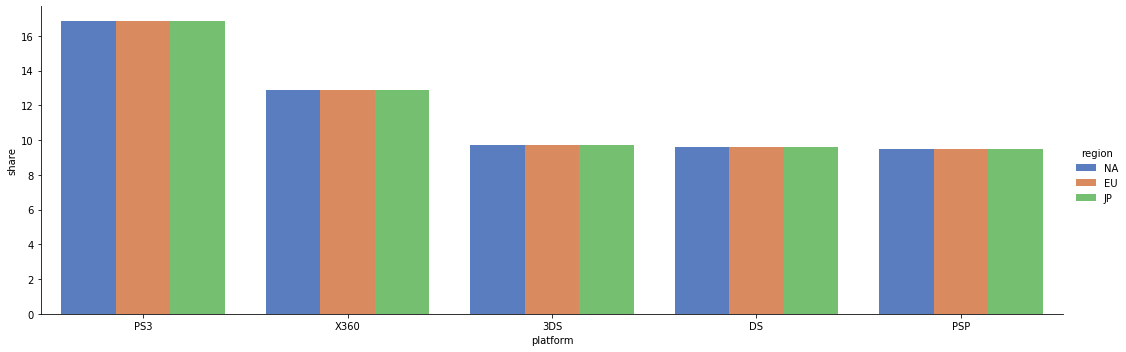

In [49]:
# Построение графика с долями продаж по каждой платформе в разрезе регионов
g = sns.catplot(x="platform", y="share",hue="region"
                     , data=games_period_all_share, kind="bar", palette="muted", aspect=3  )

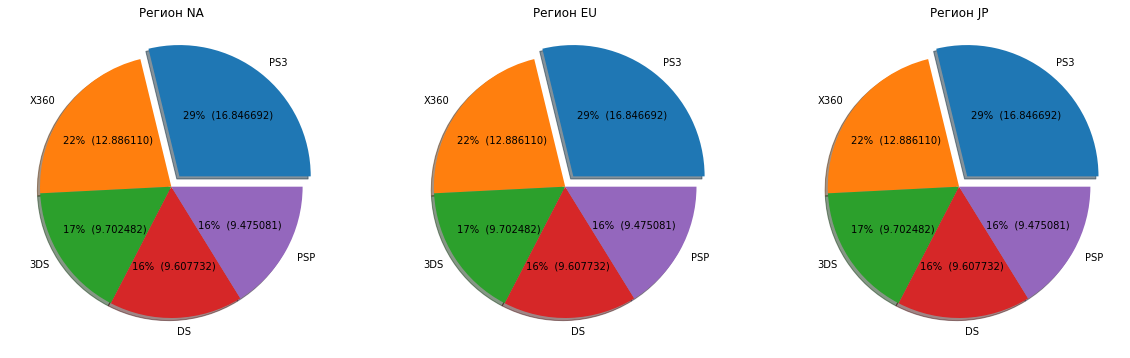

In [50]:
vals_na = games_period_all_share[games_period_all_share['region']=='NA']['share']
labels_na = games_period_all_share[games_period_all_share['region']=='NA']['platform']
vals_eu = games_period_all_share[games_period_all_share['region']=='EU']['share']
labels_eu = games_period_all_share[games_period_all_share['region']=='EU']['platform']
vals_jp = games_period_all_share[games_period_all_share['region']=='JP']['share']
labels_jp = games_period_all_share[games_period_all_share['region']=='JP']['platform']
explode = (0.1, 0, 0, 0, 0)

# Значение на графиках: Процент + Значение
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = float(pct*total/100.0)
        return '{p:.0f}%  ({v:f})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(1,3,figsize=(20, 10))
ax[0].set(title='Регион NA')
ax[0].pie(x=vals_na, explode=explode, labels=labels_na, autopct=make_autopct(vals_na), shadow=True)  
ax[1].set(title='Регион EU')
ax[1].pie(x=vals_eu, explode=explode, labels=labels_eu, autopct=make_autopct(vals_eu), shadow=True) 
ax[2].set(title='Регион JP')
ax[2].pie(x=vals_jp, explode=explode, labels=labels_jp, autopct=make_autopct(vals_jp), shadow=True) 
plt.show()

In [51]:
# Расчет топ5 жанров для NA
# количество и долю платформы относительно всех остальных платформ внутри региона NA
# количество игр на одной платформе внутри региона NA
games_genre_NA = games_period.pivot_table(index=['genre'], 
                                      values = 'name', 
                                      aggfunc = ['count']).stack().reset_index()
games_genre_NA.set_axis(['genre',
                'delete',
                'na_count'], axis = 'columns',inplace=True)
games_genre_NA = games_genre_NA.loc[:, ['genre','na_count']]
games_genre_NA['region']='NA'
# доля = отношение количества игра на одной платформе 
# к общему количеству игр, проданных в регионе NA
games_genre_NA['share']=games_genre_NA['na_count']/games_genre_NA['na_count'].sum()*100
#  топ-5 NA
games_genre_NA = games_genre_NA.sort_values(by=['share'], ascending = False).head(5)
games_genre_NA

,genre,na_count,region,share
0,Action,1495,NA,28.330491
3,Misc,576,NA,10.915293
10,Sports,575,NA,10.896343
7,Role-Playing,568,NA,10.763691
1,Adventure,563,NA,10.668941


In [52]:
# Расчет топ5 жанров для EU
# количество и долю платформы относительно всех остальных платформ внутри региона EU
# количество игр на одной платформе внутри региона EU
games_genre_EU = games_period.pivot_table(index=['genre'], 
                                      values = 'name', 
                                      aggfunc = ['count']).stack().reset_index()
games_genre_EU.set_axis(['genre',
                'delete',
                'eu_count'], axis = 'columns',inplace=True)
games_genre_EU = games_genre_EU.loc[:, ['genre','eu_count']]
games_genre_EU['region']='EU'
# доля = отношение количества игра на одной платформе 
# к общему количеству игр, проданных в регионе EU
games_genre_EU['share']=games_genre_EU['eu_count']/games_genre_EU['eu_count'].sum()*100
#  топ-5 EU
games_genre_EU = games_genre_EU.sort_values(by=['share'], ascending = False).head(5)
games_genre_EU

,genre,eu_count,region,share
0,Action,1495,EU,28.330491
3,Misc,576,EU,10.915293
10,Sports,575,EU,10.896343
7,Role-Playing,568,EU,10.763691
1,Adventure,563,EU,10.668941


In [53]:
# Расчет топ5 жанров для JP
# количество и долю платформы относительно всех остальных платформ внутри региона JP
# количество игр на одной платформе внутри региона JP
games_genre_JP = games_period.pivot_table(index=['genre'], 
                                      values = 'name', 
                                      aggfunc = ['count']).stack().reset_index()
games_genre_JP.set_axis(['genre',
                'delete',
                'jp_count'], axis = 'columns',inplace=True)
games_genre_JP = games_genre_JP.loc[:, ['genre','jp_count']]
games_genre_JP['region']='JP'
# доля = отношение количества игра на одной платформе 
# к общему количеству игр, проданных в регионе JP
games_genre_JP['share']=games_genre_JP['jp_count']/games_genre_JP['jp_count'].sum()*100
#  топ-5 JP
games_genre_JP = games_genre_JP.sort_values(by=['share'], ascending = False).head(5)
games_genre_JP

,genre,jp_count,region,share
0,Action,1495,JP,28.330491
3,Misc,576,JP,10.915293
10,Sports,575,JP,10.896343
7,Role-Playing,568,JP,10.763691
1,Adventure,563,JP,10.668941


In [54]:
# Соединяем 3 таблицыс топ5 жанров в один DataFrame для построения общего графика в разрезе регионов
games_period_genre_all_share = games_genre_NA.merge(games_genre_EU,on=['genre','region','share'],how='outer')
games_period_genre_all_share = games_period_genre_all_share.merge(games_genre_JP,on=['genre','region','share'],how='outer')
games_period_genre_all_share

,genre,na_count,region,share,eu_count,jp_count
0,Action,1495.0,NA,28.330491,NaN,NaN
1,Misc,576.0,NA,10.915293,NaN,NaN
2,Sports,575.0,NA,10.896343,NaN,NaN
3,Role-Playing,568.0,NA,10.763691,NaN,NaN
4,Adventure,563.0,NA,10.668941,NaN,NaN
5,Action,NaN,EU,28.330491,1495.0,NaN
6,Misc,NaN,EU,10.915293,576.0,NaN
7,Sports,NaN,EU,10.896343,575.0,NaN
8,Role-Playing,NaN,EU,10.763691,568.0,NaN
9,Adventure,NaN,EU,10.668941,563.0,NaN


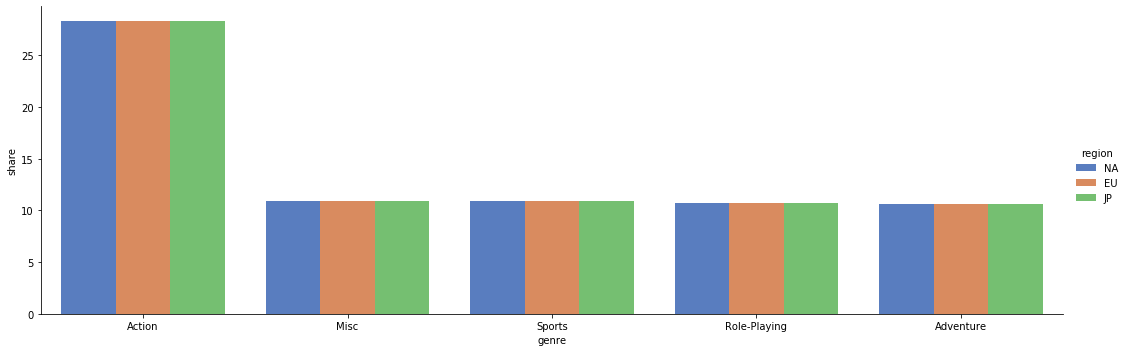

In [55]:
# Построение графика с долями продаж по жанрам в разрезе регионов
g = sns.catplot(x="genre", y="share",hue="region"
                     , data=games_period_genre_all_share, kind="bar", palette="muted", aspect=3  )

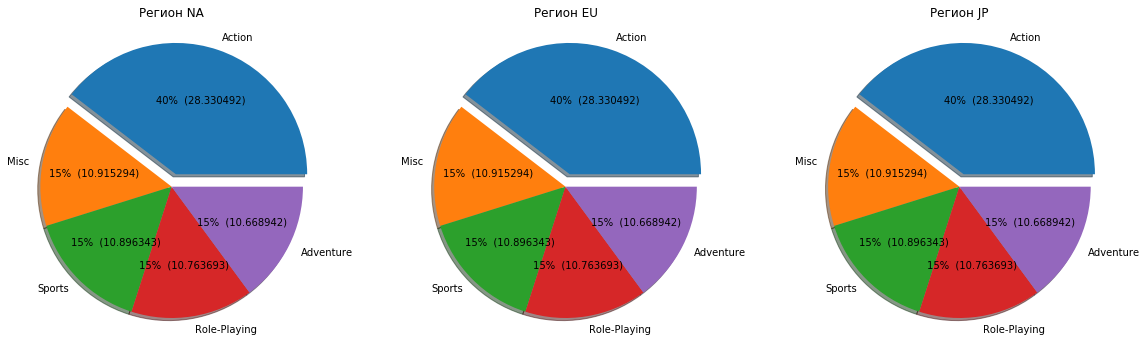

In [56]:
vals_na = games_period_genre_all_share[games_period_genre_all_share['region']=='NA']['share']
labels_na = games_period_genre_all_share[games_period_genre_all_share['region']=='NA']['genre']
vals_eu = games_period_genre_all_share[games_period_genre_all_share['region']=='EU']['share']
labels_eu = games_period_genre_all_share[games_period_genre_all_share['region']=='EU']['genre']
vals_jp = games_period_genre_all_share[games_period_genre_all_share['region']=='JP']['share']
labels_jp = games_period_genre_all_share[games_period_genre_all_share['region']=='JP']['genre']
explode = (0.1, 0, 0, 0, 0)

# Значение на графиках: Процент + Значение
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = float(pct*total/100.0)
        return '{p:.0f}%  ({v:f})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(1,3,figsize=(20, 10))
ax[0].set(title='Регион NA')
ax[0].pie(x=vals_na, explode=explode, labels=labels_na, autopct=make_autopct(vals_na), shadow=True)  
ax[1].set(title='Регион EU')
ax[1].pie(x=vals_eu, explode=explode, labels=labels_eu, autopct=make_autopct(vals_eu), shadow=True) 
ax[2].set(title='Регион JP')
ax[2].pie(x=vals_jp, explode=explode, labels=labels_jp, autopct=make_autopct(vals_jp), shadow=True) 
plt.show()

In [57]:
# Расчет продаж в NA в разрезе рейтинга 
games_period_sales_rating_na = games_period.pivot_table(index=['rating'], 
                                      values = 'na_sales', 
                                      aggfunc = ['sum']).stack().reset_index()
games_period_sales_rating_na = games_period_sales_rating_na.sort_values(by=['sum'], ascending = False)
games_period_sales_rating_na['region'] = 'NA'
games_period_sales_rating_na.head()

,rating,level_1,sum,region
3,M,na_sales,382.22,NA
0,E,na_sales,271.15,NA
5,T,na_sales,160.81,NA
1,E10+,na_sales,159.38,NA
2,EC,na_sales,1.13,NA


In [58]:
# Расчет продаж в EU в разрезе рейтинга 
games_period_sales_rating_eu = games_period.pivot_table(index=['rating'], 
                                      values = 'eu_sales', 
                                      aggfunc = ['sum']).stack().reset_index()
games_period_sales_rating_eu = games_period_sales_rating_eu.sort_values(by=['sum'], ascending = False)
games_period_sales_rating_eu['region'] = 'EU'
games_period_sales_rating_eu.head()

,rating,level_1,sum,region
3,M,eu_sales,292.04,EU
0,E,eu_sales,197.34,EU
5,T,eu_sales,113.08,EU
1,E10+,eu_sales,99.28,EU
4,RP,eu_sales,0.03,EU


In [59]:
# Расчет продаж в JP в разрезе рейтинга 
games_period_sales_rating_jp = games_period.pivot_table(index=['rating'], 
                                      values = 'jp_sales', 
                                      aggfunc = ['sum']).stack().reset_index()
games_period_sales_rating_jp = games_period_sales_rating_jp.sort_values(by=['sum'], ascending = False)
games_period_sales_rating_jp['region'] = 'JP'
games_period_sales_rating_jp.head()

,rating,level_1,sum,region
0,E,jp_sales,47.87,JP
5,T,jp_sales,42.11,JP
3,M,jp_sales,30.45,JP
1,E10+,jp_sales,13.22,JP
2,EC,jp_sales,0.00,JP


In [60]:
# Соединяем 3 таблицы с расчетом продаж в регионаз в 1 DataFrame для построения общего графика в разрезе регионов
games_period_sales_rating_all = games_period_sales_rating_na.merge(games_period_sales_rating_eu,on=['rating','region','sum'],how='outer')
games_period_sales_rating_all = games_period_sales_rating_all.merge(games_period_sales_rating_jp,on=['rating','region','sum'],how='outer')
games_period_sales_rating_all

,rating,level_1_x,sum,region,level_1_y,level_1
0,M,na_sales,382.22,NA,NaN,NaN
1,E,na_sales,271.15,NA,NaN,NaN
2,T,na_sales,160.81,NA,NaN,NaN
3,E10+,na_sales,159.38,NA,NaN,NaN
4,EC,na_sales,1.13,NA,NaN,NaN
5,RP,na_sales,0.00,NA,NaN,NaN
6,M,NaN,292.04,EU,eu_sales,NaN
7,E,NaN,197.34,EU,eu_sales,NaN
8,T,NaN,113.08,EU,eu_sales,NaN
9,E10+,NaN,99.28,EU,eu_sales,NaN


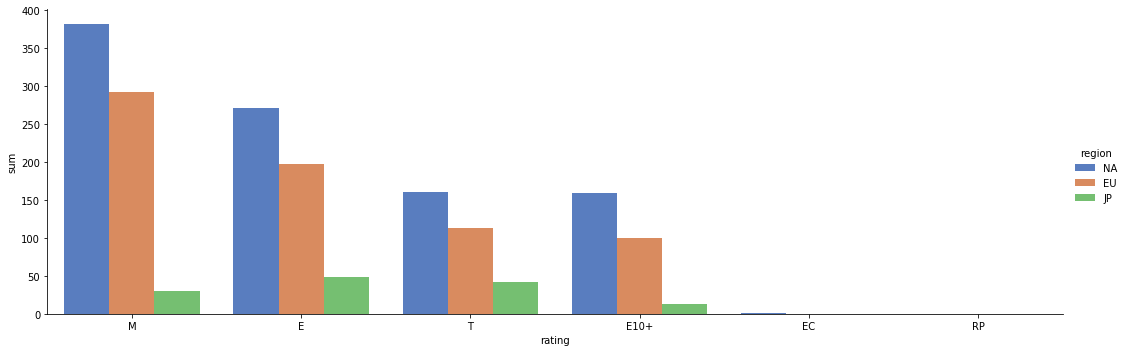

In [61]:
# Построим график влияния рейтинга ESRB на продажи в разрезе регионов
g = sns.catplot(x="rating", y="sum",hue="region"
                     , data=games_period_sales_rating_all, kind="bar", palette="muted", aspect=3  )

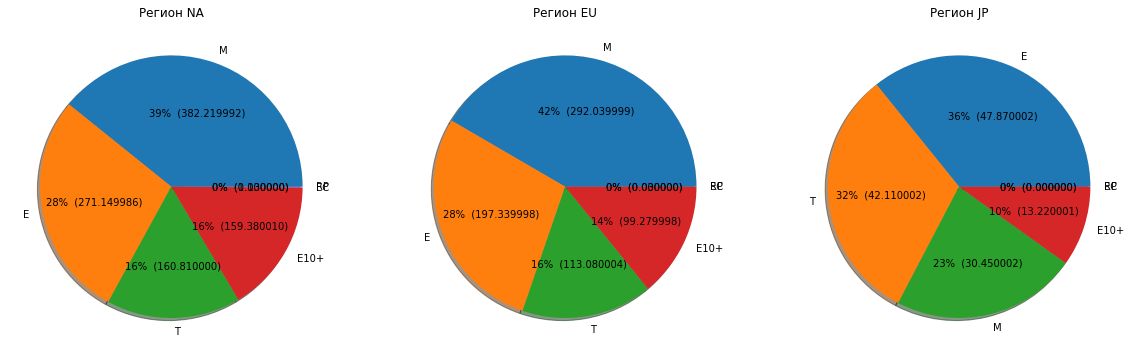

In [62]:
vals_na = games_period_sales_rating_all[games_period_sales_rating_all['region']=='NA']['sum']
labels_na = games_period_sales_rating_all[games_period_sales_rating_all['region']=='NA']['rating']
vals_eu = games_period_sales_rating_all[games_period_sales_rating_all['region']=='EU']['sum']
labels_eu = games_period_sales_rating_all[games_period_sales_rating_all['region']=='EU']['rating']
vals_jp = games_period_sales_rating_all[games_period_sales_rating_all['region']=='JP']['sum']
labels_jp = games_period_sales_rating_all[games_period_sales_rating_all['region']=='JP']['rating']
explode = (0, 0, 0, 0, 0, 0)

# Значение на графиках: Процент + Значение
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = float(pct*total/100.0)
        return '{p:.0f}%  ({v:f})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(1,3,figsize=(20, 10))
ax[0].set(title='Регион NA')
ax[0].pie(x=vals_na, explode=explode, labels=labels_na, autopct=make_autopct(vals_na), shadow=True)  
ax[1].set(title='Регион EU')
ax[1].pie(x=vals_eu, explode=explode, labels=labels_eu, autopct=make_autopct(vals_eu), shadow=True) 
ax[2].set(title='Регион JP')
ax[2].pie(x=vals_jp, explode=explode, labels=labels_jp, autopct=make_autopct(vals_jp), shadow=True) 
plt.show()

### Вывод
1. Во всех регионах NA, EU, JP топ5 платформ с долями выглядит:
    + PS3 (16,9 %);
    + X360 (12,9 %);
    + 3DS (9,7 %);
    + DS (9,6 %);
    + PSP (9,5 %).
2. Для платформ 3DS (9,7 %), DS (9,6 %), PSP (9,5 %) различия в долях нет.
3. Можно выделить самые популярные по продажам платформы - PS3 (16,9 %) и X360 (12,9 %).
4. Во всех регионах NA, EU, JP топ5 жанров с долями выглядит:
    + Action (28,3 %);
    + Misc (10,9 %);
    + Sports (10,9 %);
    + Role-Playing (10,9 %);
    + Adventure (10,9 %).
5. Можно выделить самый популярный по продажам жанр - Action (28,3 %)
6. Для жанров Misc (10,9 %), Sports (10,9 %), Role-Playing (10,9 %), Adventure (10,9 %) различия в долях нет.
7. Рейтинг ESRB влияет на продажи в отдельном регионе:
    + в регионе NA рейтинг ESRB оказывает наибольшее влияние на продажи; 
    + в регионе EU рейтинг ESRB оказывает среднее влияние на продажи, но меньшее влияние по сравнению с влиянием в NA;
    + в регионе JP рейтинг ESRB практически не оказывает влияние на продажи. 

### Проверка гипотезы

In [63]:
# Импорт библиотеки scipy
from scipy import stats as st

#### Гипотеза 1
H0 - нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".          
H1 - альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC разные".

In [64]:
revenue_XOne = games_period[games_period['platform'] == 'XOne'].loc[:, ['user_score']]
revenue_PC = games_period[games_period['platform'] == 'PC'].loc[:, ['user_score']]
print(revenue_XOne.head(10))
print(revenue_PC.head(10))

     user_score
99          0.0
165         7.9
179         5.4
242         6.4
270         6.2
342         0.0
373         4.1
398         5.5
413         7.5
417         4.4
      user_score
192          4.0
218          8.2
313          8.1
458          3.9
480          5.9
538          7.5
688          7.9
800          5.6
959          4.8
1040         2.5


In [65]:
# Проверка гипотезы 1
# Уровень значимости
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

# Проверим нулевую гипотезу 1 t-тестом о равенстве среднего двух генеральных 
# совокупностей по взятым из них выборкам
results  = st.ttest_ind(revenue_XOne, revenue_PC)
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  [0.23633954]
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза 2
H0 - нулевая гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые".               
H1 - альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные".

In [66]:
revenue_Action = games_period[games_period['genre'] == 'Action'].loc[:, ['user_score']]
revenue_Sports = games_period[games_period['genre'] == 'Sports'].loc[:, ['user_score']]
print(revenue_Action.head(10))
print(revenue_Sports.head(10))

     user_score
16          8.2
23          8.1
42          8.3
81          6.6
118         8.3
125         8.8
127         6.9
135         9.0
149         9.1
164         8.6
     user_score
77          4.3
94          5.0
119         0.0
122         0.0
126         4.3
141         7.4
143         5.7
202         8.0
264         4.5
271         4.2


In [67]:
# Проверка гипотезы 2
# Уровень значимости
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

# Проверим нулевую гипотезу 2 t-тестом о равенстве среднего двух генеральных 
# совокупностей по взятым из них выборкам
results  = st.ttest_ind(revenue_Action, revenue_Sports)
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  [0.07477854]
Не получилось отвергнуть нулевую гипотезу


### Вывод
1. Гипотеза 1 "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не отвергнута.
2. Гипотеза 2 "Средние пользовательские рейтинги жанров Action и Sports одинаковые" - не отвергнута.
#### Итог:
Средний пользовательский рейтинг платформы "Xbox One" равен среднему пользовательскому рейтингу платформы "PC".
Средний пользовательский рейтинг жанра "Action" равен среднему пользовательскому рейтингу "Sports".

### Общий вывод

1. Для проведения анализа, исследуемые данные были преобразованы следующим образом:
    + системные наименования колонок приведены к нижнему регистру;
    + сомнительное значение "tbd" в колонке "Оценка пользователей" было заменено на значение Nan;
    + заполнены пропуски на значение 0 в следующих колонках: "Год выпуска", "Оценка критиков", "Оценка пользователей";
    + оставлены без заполнения пропуски в следующих колонках: "Название игры", "Жанр игры", "Рейтин от организации ESRB";
    + произведена замена типа данных в следующих колонках: "Год выпуска", "Оценка пользователей", "Оценка критиков".
2. В исследуемых данных представлено 37 игр и 31 платформа.
3. Период данных по играм с 1980 по 2016 годы.
4. Максимальное количество игр в 2008-2009 годах (1426-1427).
5. Минимальное количество игр в 1980 году (9).
6. Каждая платформа "на пике" примерно 5-6 лет, потом про нее забывают.
7. По всем платформам по состоянию на конец 2016 год происходит спад продаж.
8. За всего года максимальное количество игр и общих продаж приходится на платформу PS2.
9. За все года минимальное количество игр и общих продаж приходится на платформы GG и PCFX.
10. Топ3 платформ по продажам в 2016 году можно отнести: PS4, XOne, 3DS
11. Топ3 жанров по продажам в 2016 году можно отнести:
    + Action. Количество - 1495, продажи - 673 млн. дол.
    + Shooter. Количество - 410, продажи - 450 млн. дол.
    + Sports. Количество - 575, продажи - 328 млн. дол.
12. Зависимость между отзывами критиков и продажами очень слабая.
13. Зависимость между отзывами пользователей и продажами очень слабая.
14. Во всех регионах NA, EU, JP:
    + для платформ 3DS (9,7 %), DS (9,6 %), PSP (9,5 %) различия в долях продаж нет.
    + можно выделить самые популярные по продажам платформы - PS3 (16,9 %) и X360 (12,9 %).
15. Во всех регионах NA, EU, JP:
    + можно выделить самый популярный по продажам жанр - Action (28,3 %);
    + для жанров Misc (10,9 %), Sports (10,9 %), Role-Playing (10,9 %), Adventure (10,9 %) различия в долях продаж нет.
16. Рейтинг ESRB влияет на продажи в отдельном регионе:
    + в регионе NA рейтинг ESRB оказывает наибольшее влияние на продажи; 
    + в регионе EU рейтинг ESRB оказывает среднее влияние на продажи, но меньшее влияние по сравнению с влиянием в NA;
    + в регионе JP рейтинг ESRB практически не оказывает влияние на продажи. 
17. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
18. Средние пользовательские рейтинги жанров Action и Sports одинаковые.
#### Итог:
1. Самая продаваемая платформа в настоящее время PS3.
2. Самая продаваемый жанр игр Action.
3. Рейтинг ESRB влияет на продажи только в регионах NA и EU.
4. Отзывы критиков и пользователей очень слабо влияют на продажи.